In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression # for linear regression
from sklearn.neighbors import KNeighborsRegressor # for kNN
from sklearn import preprocessing # for scaling the data
from sklearn.model_selection import KFold, cross_validate # for Cross-validation
from sklearn.metrics import r2_score, mean_squared_error
np.random.seed(371)

# Read in the data

In [2]:
df = pd.read_csv('./lab1_data.csv')
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,694,5.94,3.55,42.64,36
1,Quest,Azamara,6,30.277,694,5.94,3.55,42.64,36
2,Celebration,Carnival,26,47.262,1486,7.22,7.43,31.80,67
3,Conquest,Carnival,11,110.000,2974,9.53,14.88,36.99,191
4,Destiny,Carnival,17,101.353,2642,8.92,13.21,38.36,100


In [3]:
# pick some columns for our practice
cols = ["Tonnage", "length", "cabins", "crew", "passengers"]

df_selected = df[cols]

# Explore the data

In [4]:
df_selected.describe()

,Tonnage,length,cabins,crew,passengers
count,158.000000,158.000000,158.000000,158.000000,158.000000
mean,71.284671,8.130633,8.830000,78.012658,1845.740506
std,37.229540,1.793474,4.471417,35.020283,967.709478
min,2.329000,2.790000,0.330000,6.000000,66.000000
25%,46.013000,7.100000,6.132500,55.250000,1253.500000
50%,71.899000,8.555000,9.570000,81.500000,1950.000000
75%,90.772500,9.510000,10.885000,100.000000,2484.500000
max,220.000000,11.820000,27.000000,210.000000,5400.000000


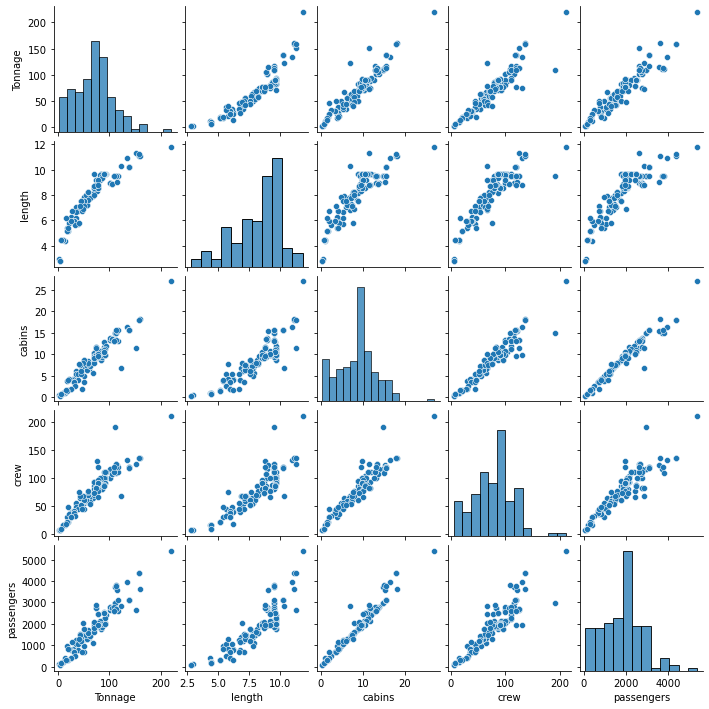

In [5]:
sns.pairplot(df_selected, height=2.0)

**Think: Observations from the plot?**

ANSWER: All the variables have a positive corelation between them. 
We see a steep positive slope between passengers and cabins. As the number of pasengers increase, the cabins increase as well. 
We also see steep positive slope with crew as well, that is, as passengers and cabins increase, the demand for crew also increases as they have to maintain the ship and handle the passengers. 

# Prepare the data using cross validation

In [6]:
x_cols = ["Tonnage", "length", "cabins", "crew"]
y_col = "passengers"

X_full = df_selected[x_cols]
y_full = df_selected[y_col]

In [7]:
cv_split = KFold(n_splits=5, shuffle=True, random_state=371) # random state ensures reproducable output across multiple function calls

In [8]:
for idx_train, idx_test in cv_split.split(X_full, y_full):
    X_train = X_full.iloc[idx_train]
    X_test = X_full.iloc[idx_test]
    y_train = y_full.iloc[idx_train]
    y_test = y_full.iloc[idx_test]
    print(X_train.shape, X_test.shape)

(126, 4) (32, 4)
(126, 4) (32, 4)
(126, 4) (32, 4)
(127, 4) (31, 4)
(127, 4) (31, 4)


# Compare LR and KNN (k=3)

In [9]:
lr = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=3)

## Example of training linear regression model

In [10]:
# 2 types of error
r2_lr_list = []
mse_lr_list = []

for idx_train, idx_test in cv_split.split(X_full, y_full):
    X_train = X_full.iloc[idx_train]
    X_test = X_full.iloc[idx_test]
    y_train = y_full.iloc[idx_train]
    y_test = y_full.iloc[idx_test]
    
    # linear regression
    m_lr = lr.fit(X_train, y_train)
    y_pred = m_lr.predict(X_test)
    
    # R^2
    r2_lr = r2_score(y_true=y_test, y_pred=y_pred)
    r2_lr_list.append(r2_lr)
    
    # mean squared error
    mse_lr = mean_squared_error(y_true=y_test, y_pred=y_pred)
    mse_lr_list.append(mse_lr)

print("average R2 score for linear regression:", np.mean(r2_lr_list))
print("average MSE linear regression:", np.mean(mse_lr_list))

average R2 score for linear regression: 0.9480419620768963
average MSE linear regression: 41375.769664874286


## TODO 1: Following the example, training a KNN model (K=3). What do you find? Which model has better performance?

In [22]:
r2_knn_list = []
mse_knn_list = []

# Your code here
for idx_train, idx_test in cv_split.split(X_full, y_full):
    X_train = X_full.iloc[idx_train]
    X_test = X_full.iloc[idx_test]
    y_train = y_full.iloc[idx_train]
    y_test = y_full.iloc[idx_test]
    
    # k nearest neighbour
    m_knn = knn.fit(X_train, y_train)
    y_pred = m_knn.predict(X_test)
    
    # R^2
    r2_knn = r2_score(y_true=y_test, y_pred=y_pred)
    r2_knn_list.append(r2_knn)
    
    # mean squared error
    mse_knn = mean_squared_error(y_true=y_test, y_pred=y_pred)
    mse_knn_list.append(mse_knn)

print("average R2 score for knn:", np.mean(r2_knn_list))
print("average MSE knn:", np.mean(mse_knn_list))

average R2 score for knn: 0.8844743932435826
average MSE knn: 104455.40707885305


ANSWER: Generally, higher R2 value means the model performs better. Based on R2 value, the linear regression model performs better. 
The lower the MSE the higher the accuracy of prediction as there would be excellent match between the actual and predicted data set. Linear regression model has lower MSE value. 

## A short-cut to do cross-validation

List of available metrics found in [scikit learn documentation: scoring parameters](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)

In [13]:
metrics = ('r2', 'neg_mean_squared_error')

results_lr = cross_validate(estimator=lr, X = X_full, y = y_full, cv = cv_split, scoring = metrics, return_train_score=True)
results_knn = cross_validate(estimator=knn, X = X_full, y = y_full, cv = cv_split, scoring = metrics, return_train_score=True)

In [14]:
results_lr

{'fit_time': array([0.04099607, 0.00125408, 0.00127792, 0.00111794, 0.00103688]),
 'score_time': array([0.00229478, 0.00092793, 0.00108099, 0.0008471 , 0.00082397]),
 'test_r2': array([0.97581596, 0.9508146 , 0.96105864, 0.87857793, 0.97394268]),
 'train_r2': array([0.95334727, 0.96172013, 0.96041017, 0.97190647, 0.95634131]),
 'test_neg_mean_squared_error': array([-33643.29805604, -31760.63421478, -33538.33128831, -86406.84704642,
        -21529.73771883]),
 'train_neg_mean_squared_error': array([-37477.03868869, -38280.1317768 , -37520.51317443, -27045.66461286,
        -40418.56065386])}

In [15]:
print("average R2 score for LR:", results_lr["test_r2"].mean())
print("average R2 score KNN:", results_knn["test_r2"].mean())

print("average MSE linear regression:", results_lr["test_neg_mean_squared_error"].mean())
print("average MSE for KNN:", results_knn["test_neg_mean_squared_error"].mean())

average R2 score for LR: 0.9480419620768963
average R2 score KNN: 0.8844743932435826
average MSE linear regression: -41375.769664874286
average MSE for KNN: -104455.40707885305


In [16]:
df_results = pd.DataFrame({'k':[], 'train_error':[], 'test_error':[]})

for k in range(1,20):
    knn_i = KNeighborsRegressor(n_neighbors=k)
    results_knn_i = cross_validate(estimator=knn_i, X = X_full, y = y_full, cv = cv_split, scoring = metrics, return_train_score=True)
    df_results = df_results.append({'k': k, 
                                    'train_error': results_knn_i['train_neg_mean_squared_error'].mean() * -1, 
                                    'test_error': results_knn_i['test_neg_mean_squared_error'].mean() * -1}, ignore_index=True)

df_results

,k,train_error,test_error
0,1.0,0.707662,97386.466734
1,2.0,28912.104934,96073.377369
2,3.0,49546.975078,104455.407079
3,4.0,62332.682384,113585.677508
4,5.0,72862.537094,118121.459669
5,6.0,80880.750423,121469.986593
6,7.0,84952.305513,118869.866487
7,8.0,88831.079471,123156.633572
8,9.0,90639.463221,116838.024111
9,10.0,94162.548419,114674.361974


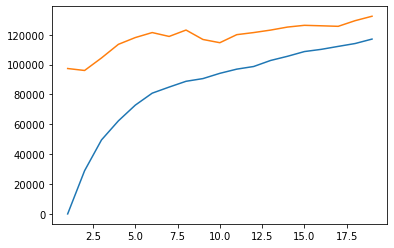

In [17]:
plt.plot(df_results['k'], df_results['train_error'])
plt.plot(df_results['k'], df_results['test_error'])

# Scaling the data for better performance

In [18]:
scaler = preprocessing.StandardScaler()

array([[<AxesSubplot:title={'center':'Tonnage'}>,
        <AxesSubplot:title={'center':'length'}>],
       [<AxesSubplot:title={'center':'cabins'}>,
        <AxesSubplot:title={'center':'crew'}>]], dtype=object)

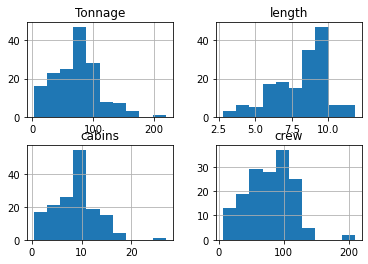

In [19]:
X_full.hist()

array([[<AxesSubplot:title={'center':'Tonnage'}>,
        <AxesSubplot:title={'center':'length'}>],
       [<AxesSubplot:title={'center':'cabins'}>,
        <AxesSubplot:title={'center':'crew'}>]], dtype=object)

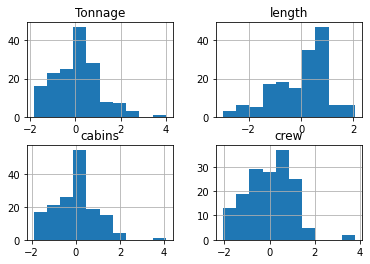

In [20]:
X_full_transform = scaler.fit(X_full).transform(X_full)
# same results:
# X_full_transform = scaler.fit_transform(X_full)

X_full_transform = pd.DataFrame(X_full_transform, columns=X_full.columns)
X_full_transform.hist()

## Example of scaling the linear regression model

In [23]:
r2_lr_list_scale = []
mse_lr_list_scale = []

for idx_train, idx_test in cv_split.split(X_full, y_full):
    X_train = X_full.iloc[idx_train]
    X_test = X_full.iloc[idx_test]
    y_train = y_full.iloc[idx_train]
    y_test = y_full.iloc[idx_test]
    
    scaler_standard = scaler.fit(X_train)
    X_train_standard = scaler_standard.transform(X_train)
    X_test_standard = scaler_standard.transform(X_test)
    
    # linear regression
    m_lr = lr.fit(X_train_standard, y_train)
    y_pred = m_lr.predict(X_test_standard)
    r2_lr = r2_score(y_true=y_test, y_pred=y_pred)
    mse_le = mean_squared_error(y_true=y_test, y_pred=y_pred)
    
    r2_lr_list_scale.append(r2_lr)
    mse_lr_list_scale.append(mse_le)
print("average R2 score:", np.mean(r2_lr_list_scale))
print("average MSE:", np.mean(mse_lr_list_scale))

print("average R2 score:", np.mean(r2_lr_list))
print("average MSE:", np.mean(mse_lr_list))

average R2 score: 0.9480419620768963
average MSE: 41375.769664874264
average R2 score: 0.9162581776602394
average MSE: 41375.769664874286


**Think: How does the results compared to the previous linear regression model without scaling? Why?**

The linear regression model performs better after scaling as the R2 value increases from 0.91 to 0.94. There is some substantial improvement in performance. This happens because now the features/variables have comparable values in the same range and do not skew the result towards one side. 

## TODO 2: Following the example, train a KNN (K=3) model with the scaling.

In [25]:
r2_knn_list_scale = []
mse_knn_list_scale = []

# Your code here
for idx_train, idx_test in cv_split.split(X_full, y_full):
    X_train = X_full.iloc[idx_train]
    X_test = X_full.iloc[idx_test]
    y_train = y_full.iloc[idx_train]
    y_test = y_full.iloc[idx_test]
    
    scaler_standard = scaler.fit(X_train)
    X_train_standard = scaler_standard.transform(X_train)
    X_test_standard = scaler_standard.transform(X_test)
    
    # knn
    m_knn = knn.fit(X_train_standard, y_train)
    y_pred = m_knn.predict(X_test_standard)
    r2_knn = r2_score(y_true=y_test, y_pred=y_pred)
    mse_knn = mean_squared_error(y_true=y_test, y_pred=y_pred)
    
    r2_knn_list_scale.append(r2_knn)
    mse_knn_list_scale.append(mse_knn)
print("average R2 score:", np.mean(r2_knn_list_scale))
print("average MSE:", np.mean(mse_knn_list_scale))

print("average R2 score:", np.mean(r2_knn_list))
print("average MSE:", np.mean(mse_knn_list))

average R2 score: 0.9288492935982386
average MSE: 69673.52674731184
average R2 score: 0.8844743932435826
average MSE: 104455.40707885305


**Think Again: How does the results compared to the previous KNN model without scaling? Why?**

ANSWER: The KNN model performs much better after scaling. The R2 value increased from 0.88 to 0.92 after scaling and MSE value decreases substantially, improving the overall performance of the KNN model. 
This happens because now the features/variables have comparable values in the same range and do not skew the result towards one side. 